In [76]:
import tensorflow as tf
from keras.models import Sequential
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [58]:
X, y = load_data()

In [59]:
print(X[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [60]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


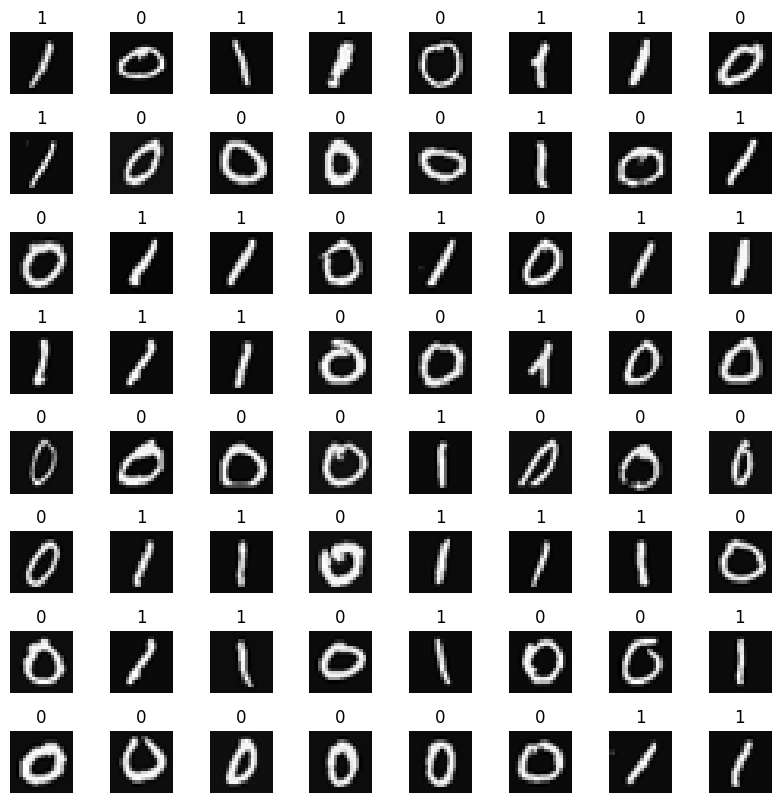

In [82]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [74]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),    #specify input size
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "my_model"
)

In [65]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                10025     
                                                                 
 dense_10 (Dense)            (None, 15)                390       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [66]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [67]:
[layer1, layer2, layer3] = model.layers

In [68]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [69]:
print(model.layers[2].weights)

[<tf.Variable 'dense_11/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.2817645 ],
       [-0.16770124],
       [-0.50770247],
       [-0.1941604 ],
       [ 0.50773674],
       [ 0.2867561 ],
       [-0.28853866],
       [-0.02942443],
       [-0.4403731 ],
       [ 0.06043345],
       [ 0.54424137],
       [ 0.5045975 ],
       [ 0.1760531 ],
       [ 0.02454829],
       [ 0.04252821]], dtype=float32)>, <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [70]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 886us/step - loss: 0.5987
Epoch 2/20
32/32 [==============================] - 0s 965us/step - loss: 0.4501
Epoch 3/20
32/32 [==============================] - 0s 836us/step - loss: 0.3145
Epoch 4/20
32/32 [==============================] - 0s 804us/step - loss: 0.2189
Epoch 5/20
32/32 [==============================] - 0s 772us/step - loss: 0.1598
Epoch 6/20
32/32 [==============================] - 0s 836us/step - loss: 0.1229
Epoch 7/20
32/32 [==============================] - 0s 836us/step - loss: 0.0986
Epoch 8/20
32/32 [==============================] - 0s 810us/step - loss: 0.0814
Epoch 9/20
32/32 [==============================] - 0s 772us/step - loss: 0.0687
Epoch 10/20
32/32 [==============================] - 0s 836us/step - loss: 0.0591
Epoch 11/20
32/32 [==============================] - 0s 771us/step - loss: 0.0516
Epoch 12/20
32/32 [==============================] - 0s 772us/step - loss: 0.0455
Epoch 13/20
32/32 [======

In [79]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 14ms/step
 predicting a zero: [[0.47700813]]
1/1 [==============================] - 0s 15ms/step
 predicting a one:  [[0.46981043]]


In [80]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 0


1/1 [==============================] - 0s 14ms/step


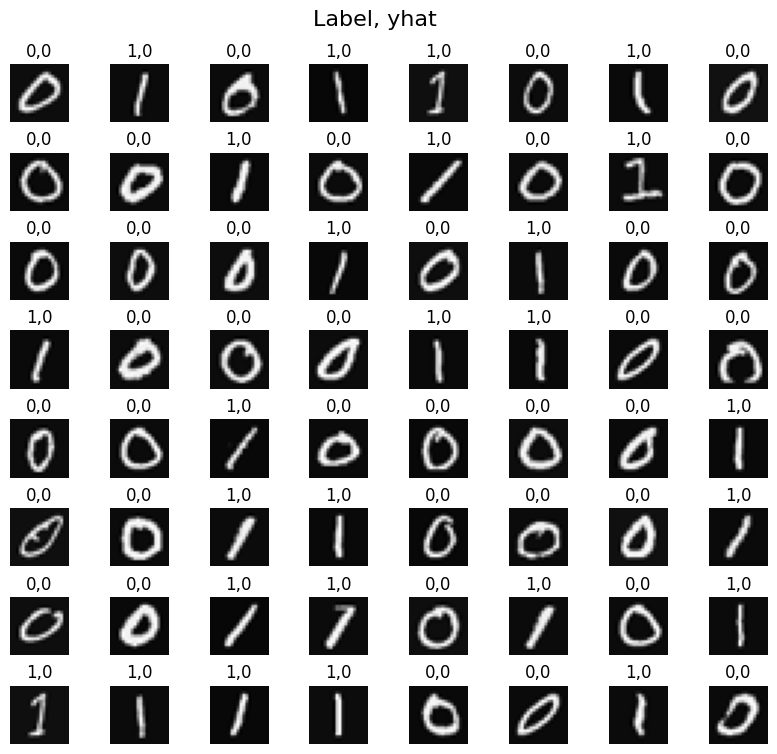

In [81]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()